In [1]:
import pandas as pd
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
import joblib

In [2]:
df = pd.read_csv("C:\\Users\\hoi\\Desktop\\SAT revw\\coursera_dataset_cleaned.csv")
df.head()

,course_title,enrollment_id,platform,instructor_profile,reviews_count,success_score,category,rating,difficulty_level,students_enrolled,price_usd
0,Getting started with the Vertex AI Gemini 1.5 ...,C1,Coursera,University Professor,4059,8.157336,Data Science / AI,3.9,BEGINNER,228403,49.0
1,SPSS: Apply & Interpret Logistic Regression Mo...,C2,Coursera,Corporate Trainer,39703,8.764936,Other,3.8,BEGINNER,368698,29.0
2,Securing Compute Engine Applications and Resou...,C3,Coursera,Corporate Trainer,15022,8.346109,Other,3.5,INTERMEDIATE,283963,49.0
3,IntÃƒÆ’Ã†â€™Ãƒâ€šÃ‚Â©grer des applications dan...,C4,Coursera,Industry Expert,11324,8.534452,Design,4.4,BEGINNER,212935,79.0
4,Overcoming Challenges in Self and Society,C5,Coursera,Corporate Trainer,6229,8.580771,Other,4.5,BEGINNER,291664,0.0


In [3]:
print(df.columns.tolist())


['course_title', 'enrollment_id', 'platform', 'instructor_profile', 'reviews_count', 'success_score', 'category', 'rating', 'difficulty_level', 'students_enrolled', 'price_usd']


In [4]:

df_encoded = pd.get_dummies(
    df,
    columns=["course_title", "platform", "instructor_profile", "category", "difficulty_level"]
)

# Separate features (X) and target (y)
X = df_encoded.drop("success_score", axis=1)
y = df_encoded["success_score"]

print("✅ Data encoded successfully!")
print("Feature columns:", X.columns.tolist())

✅ Data encoded successfully!
Feature columns: ['enrollment_id', 'reviews_count', 'rating', 'students_enrolled', 'price_usd', 'course_title_    GenAI for Compensation: Smarter Pay Equity Analysis', 'course_title_   Ù„Ù„Ù…Ø¨ØªØ¯Ø¦ÙŠÙ† Metasploit: Ø£Ø³Ø§Ø³ÙŠØ§Øª Ø§Ù„Ø§Ø³ØªØºÙ„Ø§Ù„ ', 'course_title_  Creating a Quiz Game using Vanilla JavaScript', 'course_title_ Advanced Cybersecurity Techniques', 'course_title_ Applied Sustainability Engineering', 'course_title_ AtenciÃ³n inclusiva al pÃºblico con discapacidad', 'course_title_ AtenciÃ³n prehospitalaria del ictus agudo y selecciÃ³n de pacientes para tratamiento endovascular con la escala RACE', 'course_title_ Automate Blog Advertisements with Zapier ', 'course_title_ Bases de Datos NoSQL en Azure', 'course_title_ Conflict resolution for Leaders', 'course_title_ Create a Budget with Google Sheets', "course_title_ CrÃ©ation D'IdentitÃ© Visuelle En Utilisant Canva", 'course_title_ CrÃ©er des PublicitÃ©s sur Instagram', 'course_title_ Cucumber

In [7]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [10]:
df_encoded = pd.get_dummies(
    df,
    columns=["platform", "category", "difficulty_level"]  # keep only useful categorical
)

# Drop irrelevant text/ID columns
X = df_encoded.drop(["success_score", "course_title", "enrollment_id", "instructor_profile"], axis=1)
y = df_encoded["success_score"]

print("✅ Data encoded successfully!")
print("Feature columns:", X.columns.tolist())

✅ Data encoded successfully!
Feature columns: ['reviews_count', 'rating', 'students_enrolled', 'price_usd', 'platform_Coursera', 'category_Business', 'category_Business & Management', 'category_Cloud & DevOps', 'category_Computer Science / Programming', 'category_Cybersecurity', 'category_Data Analytics', 'category_Data Science / AI', 'category_Design', 'category_Engineering', 'category_Health & Life Sciences', 'category_Health & Medicine', 'category_Mathematics & Statistics', 'category_Other', 'category_Programming', 'category_Psychology', 'category_Unknown', 'category_Web Development', 'difficulty_level_ADVANCED', 'difficulty_level_BEGINNER', 'difficulty_level_INTERMEDIATE']


In [11]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [12]:
from sklearn.ensemble import GradientBoostingRegressor

model = GradientBoostingRegressor()
model.fit(X_train, y_train)

print("✅ Model trained successfully!")

✅ Model trained successfully!


In [13]:
import joblib
joblib.dump(model, "model.pkl")
print("✅ Model saved as model.pkl")

✅ Model saved as model.pkl


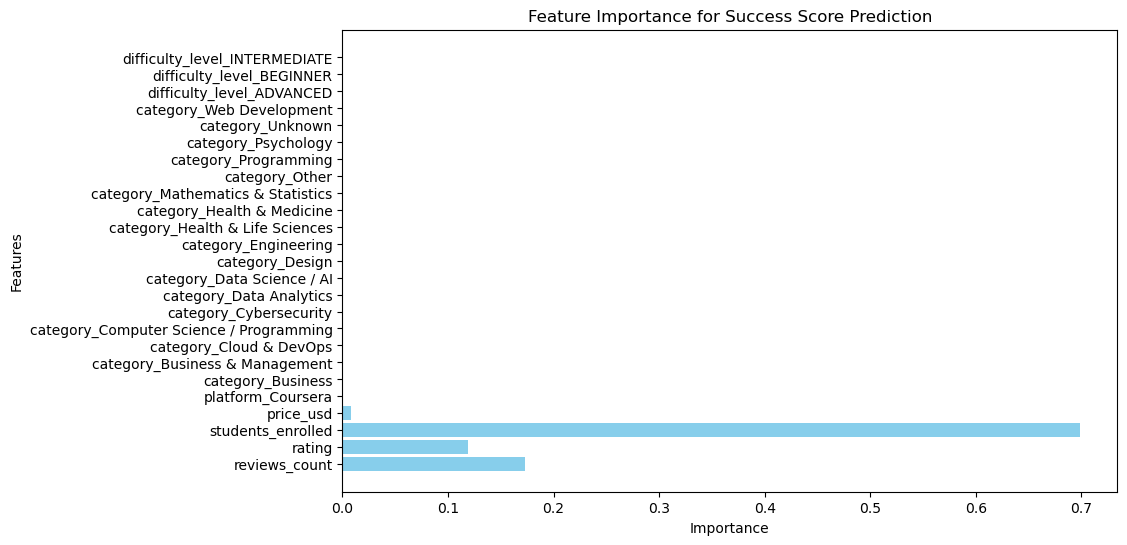

In [14]:
import matplotlib.pyplot as plt

importances = model.feature_importances_
features = X.columns

plt.figure(figsize=(10,6))
plt.barh(features, importances, color="skyblue")
plt.xlabel("Importance")
plt.ylabel("Features")
plt.title("Feature Importance for Success Score Prediction")
plt.show()

In [15]:
from sklearn.metrics import r2_score, mean_absolute_error

# Predict on test set
y_pred = model.predict(X_test)

# Calculate metrics
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print("📊 Model Evaluation Results")
print("R² Score:", r2)
print("Mean Absolute Error:", mae)

📊 Model Evaluation Results
R² Score: 0.9857373966397749
Mean Absolute Error: 0.012666635402511358
